# TRABAJO FINAL: Factores determinantes de accidentes de tránsito no fatales en Lima Metropolitana

 **GIAN PEDRO CUEVA MEZA** <br>
 **gian.cueva@urosario.edu.co <br>
El presente trabajo busca resaltar los principales factores que determinan que en un accidente de tránsito existan heridos, para lo cual usamos la base de datos: **Encuesta Nacional de Comiserias para el año 2016 y 2017 del INEI** [Ingrese aqui](http://iinei.inei.gob.pe/iinei/srienaho/Descarga/FichaTecnica/595-Ficha.pdf)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Importando dataset
data = pd.read_excel('A_T_Capitulo 100.xlsx') #base con gran cantidad de datos, esperar un poco para que cargue
data.head()

ID_N  UBIGEO  CCDI   NOMBREDI  ANIO  ID_AT  AT_N  AT_NALF  AT_TOT  AT101  \
0     1  100601     1  RUPA-RUPA  2016      1   NaN      NaN      75      1   
1     1  100601     1  RUPA-RUPA  2016      2   NaN      NaN      75      1   
2     1  100601     1  RUPA-RUPA  2016      3   NaN      NaN      75      1   
3     1  100601     1  RUPA-RUPA  2016      4   NaN      NaN      75      1   
4     1  100601     1  RUPA-RUPA  2016      5   NaN      NaN      75      1   

   ... AT109_13  AT109_14 AT109_15 AT109_16  AT109_17  AT109_18  AT109_19  \
0  ...        0         0        0        0         0         0         0   
1  ...        0         0        0        0         0         0         0   
2  ...        0         0        0        0         0         0         0   
3  ...        0         0        0        0         0         0         0   
4  ...        0         0        0        0         0         0         0   

   AT109_19_O  FACTOR_201  FACTOR_2_A  
0         NaN        2.25         NaN  
1         NaN        2.25         NaN  
2         NaN        2.25         NaN  
3         NaN        2.25         NaN  
4         NaN        2.25         NaN  

[5 rows x 99 columns]

Para mayor informacion de las variables: <br>
[Ingrese aquí](http://iinei.inei.gob.pe/microdatos/Detalle_Encuesta.asp?CU=19558&CodEncuesta=595&CodModulo=1233&NombreEncuesta=CENSO+NACIONAL+DE+COMISARIAS&NombreModulo=CAP%C3%8DTULO+100++-+CENACOM+-+AT)

In [4]:
data.columns

Index(['ID_N', 'UBIGEO', 'CCDI', 'NOMBREDI', 'ANIO', 'ID_AT', 'AT_N',
       'AT_NALF', 'AT_TOT', 'AT101', 'AT101_O', 'AT101_NRO', 'AT101_ALF',
       'AT102', 'AT103_D', 'AT103_M', 'AT103_A', 'AT103_HOR', 'AT103_MIN',
       'AT104A', 'AT104A_O', 'AT104B', 'AT104B_O', 'AT104C_V1', 'AT104C_R1',
       'AT104C_V2', 'AT104C_R2', 'AT104D_DPT', 'AT104D_PRO', 'AT104D_DIS',
       'AT105', 'AT105_O', 'AT106_1', 'AT106_1_CA', 'AT106_2', 'AT106_2_CA',
       'AT106_3', 'AT106_3_CA', 'AT106_4', 'AT106_4_CA', 'AT106_5',
       'AT106_5_CA', 'AT106_6', 'AT106_6_CA', 'AT106_7', 'AT106_7_CA',
       'AT106_8', 'AT106_8_CA', 'AT106_9', 'AT106_9_CA', 'AT106_10',
       'AT106_10_C', 'AT106_11', 'AT106_11_C', 'AT106_12', 'AT106_12_O',
       'AT106_12_C', 'AT106_13', 'AT106_13_C', 'AT106_14', 'AT106_14_C',
       'AT106_15', 'AT106_15_C', 'AT106_16', 'AT106_16_C', 'AT106_17',
       'AT106_17_C', 'AT106_18', 'AT106_18_O', 'AT106_18_C', 'AT107_1',
       'AT107_2', 'AT107_3', 'AT108', 'AT108_1', 'AT108

In [5]:
#Descripcion de las variables
data.describe()

ID_N         UBIGEO          CCDI          ANIO         ID_AT  \
count  68811.000000   68811.000000  68811.000000  68811.000000  68811.000000   
mean     732.185232  123699.071210      8.774600   2016.417826     29.517475   
std      831.978046   59160.463189     10.533365      0.493205     22.367926   
min        1.000000   10101.000000      1.000000   2016.000000      1.000000   
25%      415.000000   80101.000000      1.000000   2016.000000     10.000000   
50%      553.000000  140106.000000      5.000000   2016.000000     25.000000   
75%      896.000000  150143.000000     11.000000   2017.000000     46.000000   
max     9061.000000  250305.000000     43.000000   2017.000000    200.000000   

       AT_N  AT_NALF        AT_TOT         AT101     AT101_NRO  ...  \
count   0.0      0.0  68811.000000  68811.000000  6.881100e+04  ...   
mean    NaN      NaN     58.034951      3.995873  4.851995e+06  ...   
std     NaN      NaN     25.674817      1.641627  4.154589e+06  ...   
min     NaN      NaN      1.000000      1.000000  0.000000e+00  ...   
25%     NaN      NaN     38.000000      3.000000  3.800000e+01  ...   
50%     NaN      NaN     75.000000      5.000000  7.160454e+06  ...   
75%     NaN      NaN     75.000000      5.000000  8.665063e+06  ...   
max     NaN      NaN    200.000000      6.000000  9.999999e+06  ...   

           AT109_12      AT109_13      AT109_14      AT109_15      AT109_16  \
count  68811.000000  68811.000000  68811.000000  68811.000000  68811.000000   
mean       0.006336      0.008371      0.001119      0.153711      0.009809   
std        0.079348      0.091109      0.033433      0.360674      0.098557   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           AT109_17      AT109_18      AT109_19    FACTOR_201    FACTOR_2_A  
count  68811.000000  68811.000000  68811.000000  40060.000000  28751.000000  
mean       0.001177      0.286655      0.027583      2.912088      1.998757  
std        0.034289      0.452202      0.163775      3.351219      1.953153  
min        0.000000      0.000000      0.000000      1.000000      1.000000  
25%        0.000000      0.000000      0.000000      1.000000      1.000000  
50%        0.000000      0.000000      0.000000      1.290000      1.000000  
75%        0.000000      1.000000      0.000000      3.080000      1.950000  
max        1.000000      1.000000      1.000000     19.760000     12.050000  

[8 rows x 87 columns]

In [6]:
#información del tipo de variables de la base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68811 entries, 0 to 68810
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_N        68811 non-null  int64  
 1   UBIGEO      68811 non-null  int64  
 2   CCDI        68811 non-null  int64  
 3   NOMBREDI    68811 non-null  object 
 4   ANIO        68811 non-null  int64  
 5   ID_AT       68811 non-null  int64  
 6   AT_N        0 non-null      float64
 7   AT_NALF     0 non-null      float64
 8   AT_TOT      68811 non-null  int64  
 9   AT101       68811 non-null  int64  
 10  AT101_O     1215 non-null   object 
 11  AT101_NRO   68811 non-null  int64  
 12  AT101_ALF   753 non-null    object 
 13  AT102       68811 non-null  object 
 14  AT103_D     68811 non-null  int64  
 15  AT103_M     68811 non-null  int64  
 16  AT103_A     68811 non-null  int64  
 17  AT103_HOR   68811 non-null  int64  
 18  AT103_MIN   68811 non-null  int64  
 19  AT104A      68811 non-nul

### Limpieza de datos

In [7]:
# Filtrando los ceros en nuestra variable target:
data = data[data["AT108_2"] > 0]

In [8]:
data.shape

(42056, 99)

In [9]:
# Filtrando las obs de Lima:
data = data[(data["UBIGEO"] >= 150100) & (data["UBIGEO"] <= 150143)]

In [10]:
data.shape

(9383, 99)

In [11]:
data.head()

ID_N  UBIGEO  CCDI NOMBREDI  ANIO  ID_AT  AT_N  AT_NALF  AT_TOT  AT101  \
9422   405  150101     1     LIMA  2016      7   NaN      NaN      75      5   
9424   405  150101     1     LIMA  2016      9   NaN      NaN      75      5   
9425   405  150101     1     LIMA  2016     10   NaN      NaN      75      5   
9426   405  150101     1     LIMA  2016     11   NaN      NaN      75      5   
9427   405  150101     1     LIMA  2016     12   NaN      NaN      75      5   

      ... AT109_13  AT109_14 AT109_15 AT109_16  AT109_17  AT109_18  AT109_19  \
9422  ...        0         0        0        0         0         0         0   
9424  ...        0         0        1        0         0         0         0   
9425  ...        0         0        1        0         0         0         0   
9426  ...        0         0        0        0         0         0         0   
9427  ...        0         0        0        0         0         0         0   

      AT109_19_O  FACTOR_201  FACTOR_2_A  
9422         NaN       11.88         NaN  
9424         NaN       11.88         NaN  
9425         NaN       11.88         NaN  
9426         NaN       11.88         NaN  
9427         NaN       11.88         NaN  

[5 rows x 99 columns]

In [12]:
data = data[["NOMBREDI","ANIO","AT103_HOR","AT104A","AT105","AT107_1","AT107_2","AT107_3","AT108_1","AT108_2","AT108_3","AT109_1","AT109_2",
     "AT109_3","AT109_4","AT109_5","AT109_6","AT109_7","AT109_8","AT109_9","AT109_10","AT109_11","AT109_13","AT109_14",
     "AT109_15","AT109_16","AT109_17","AT109_18","AT109_19"]]

In [13]:
#Reseteando el índice
data.reset_index(inplace=True, drop=False)

In [14]:
data.head()

index NOMBREDI  ANIO  AT103_HOR  AT104A  AT105  AT107_1  AT107_2  AT107_3  \
0   9422     LIMA  2016          8       4      4        0        1        0   
1   9424     LIMA  2016         22       4      1        1        0        0   
2   9425     LIMA  2016         19       4      1        0        1        0   
3   9426     LIMA  2016         12       4      1        0        1        0   
4   9427     LIMA  2016         20       4      5        0        1        0   

   AT108_1  ...  AT109_9  AT109_10  AT109_11  AT109_13  AT109_14  AT109_15  \
0      NaN  ...        0         0         0         0         0         0   
1      NaN  ...        0         0         0         0         0         1   
2      NaN  ...        0         0         0         0         0         1   
3      NaN  ...        0         0         0         0         0         0   
4      NaN  ...        0         0         0         0         0         0   

   AT109_16  AT109_17  AT109_18  AT109_19  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 30 columns]

In [15]:
data = data.drop(["index"], axis=1)

In [16]:
# reemplzando nombres
data = data.rename(columns={"ANIO":"AÑO","AT103_HOR":"Hora","AT104A":"Lugar_Tipo de Vía","AT105":"Tipo de accidente","AT107_1":"Transporte Público","AT107_2":"Transporte Particular","AT107_3":"Transporte no ID","AT108_1":"No de Fallecidos","AT108_2":"No de Heridos","AT108_3":"No de Ilesos","AT109_1":"Exceso de Velocidad","AT109_2":"Resistencia a la señal de Tránsito","AT109_3":"Falta de Luz en la Vía","AT109_4":"Exceso de Carga","AT109_5":"Conductor en estado de ebriedad","AT109_6":"Maniobras peligrosas","AT109_7":"Falla mecánica","AT109_8":"Vía en mal estado","AT109_9":"Imprudencia del peatón","AT109_10":"Estado de ebriedad del peatón","AT109_11":"Factor clímatico","AT109_13":"Fatiga del conductor","AT109_14":"uso de dispositivos electrónicos","AT109_15":"Impericia","AT109_16":"Deslizamiento del lodo-piedras","AT109_17":"resistencia a la autoridad policial","AT109_18":"No ID","AT109_19":"Otros"})

In [17]:
data.head()

NOMBREDI   AÑO  Hora  Lugar_Tipo de Vía  Tipo de accidente  \
0     LIMA  2016     8                  4                  4   
1     LIMA  2016    22                  4                  1   
2     LIMA  2016    19                  4                  1   
3     LIMA  2016    12                  4                  1   
4     LIMA  2016    20                  4                  5   

   Transporte Público  Transporte Particular  Transporte no ID  \
0                   0                      1                 0   
1                   1                      0                 0   
2                   0                      1                 0   
3                   0                      1                 0   
4                   0                      1                 0   

   No de Fallecidos  No de Heridos  ...  Imprudencia del peatón  \
0               NaN            1.0  ...                       0   
1               NaN            1.0  ...                       0   
2               NaN            1.0  ...                       0   
3               NaN            1.0  ...                       0   
4               NaN            1.0  ...                       0   

   Estado de ebriedad del peatón  Factor clímatico  Fatiga del conductor  \
0                              0                 0                     0   
1                              0                 0                     0   
2                              0                 0                     0   
3                              0                 0                     0   
4                              0                 0                     0   

   uso de dispositivos electrónicos  Impericia  \
0                                 0          0   
1                                 0          1   
2                                 0          1   
3                                 0          0   
4                                 0          0   

   Deslizamiento del lodo-piedras  resistencia a la autoridad policial  No ID  \
0                               0                                    0      0   
1                               0                                    0      0   
2                               0                                    0      0   
3                               0                                    0      0   
4                               0                                    0      0   

   Otros  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 29 columns]

In [18]:
#Informacion de las variabkles de la base de datos final.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9383 entries, 0 to 9382
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   NOMBREDI                             9383 non-null   object 
 1   AÑO                                  9383 non-null   int64  
 2   Hora                                 9383 non-null   int64  
 3   Lugar_Tipo de Vía                    9383 non-null   int64  
 4   Tipo de accidente                    9383 non-null   int64  
 5   Transporte Público                   9383 non-null   int64  
 6   Transporte Particular                9383 non-null   int64  
 7   Transporte no ID                     9383 non-null   int64  
 8   No de Fallecidos                     28 non-null     float64
 9   No de Heridos                        9383 non-null   float64
 10  No de Ilesos                         9383 non-null   int64  
 11  Exceso de Velocidad           

In [19]:
#Descripcion de las variables
data.describe()

AÑO         Hora  Lugar_Tipo de Vía  Tipo de accidente  \
count  9383.000000  9383.000000        9383.000000        9383.000000   
mean   2016.472237    13.359373           4.105403           4.164127   
std       0.499255     5.958359           1.128720           2.871312   
min    2016.000000     0.000000           1.000000           1.000000   
25%    2016.000000     9.000000           4.000000           1.000000   
50%    2016.000000    14.000000           4.000000           4.000000   
75%    2017.000000    18.000000           4.000000           6.000000   
max    2017.000000    99.000000           8.000000          12.000000   

       Transporte Público  Transporte Particular  Transporte no ID  \
count         9383.000000            9383.000000       9383.000000   
mean             0.426623               0.456038          0.233721   
std              0.494613               0.498090          0.423219   
min              0.000000               0.000000          0.000000   
25%              0.000000               0.000000          0.000000   
50%              0.000000               0.000000          0.000000   
75%              1.000000               1.000000          0.000000   
max              1.000000               1.000000          1.000000   

       No de Fallecidos  No de Heridos  No de Ilesos  ...  \
count         28.000000    9383.000000   9383.000000  ...   
mean           1.285714       1.382607      1.135245  ...   
std            0.809991       1.066757      0.646010  ...   
min            1.000000       1.000000      0.000000  ...   
25%            1.000000       1.000000      1.000000  ...   
50%            1.000000       1.000000      1.000000  ...   
75%            1.000000       1.000000      1.000000  ...   
max            5.000000      25.000000      9.000000  ...   

       Imprudencia del peatón  Estado de ebriedad del peatón  \
count             9383.000000                    9383.000000   
mean                 0.098263                       0.009379   
std                  0.297686                       0.096393   
min                  0.000000                       0.000000   
25%                  0.000000                       0.000000   
50%                  0.000000                       0.000000   
75%                  0.000000                       0.000000   
max                  1.000000                       1.000000   

       Factor clímatico  Fatiga del conductor  \
count       9383.000000           9383.000000   
mean           0.004370              0.009272   
std            0.065962              0.095849   
min            0.000000              0.000000   
25%            0.000000              0.000000   
50%            0.000000              0.000000   
75%            0.000000              0.000000   
max            1.000000              1.000000   

       uso de dispositivos electrónicos    Impericia  \
count                       9383.000000  9383.000000   
mean                           0.000533     0.186827   
std                            0.023079     0.389794   
min                            0.000000     0.000000   
25%                            0.000000     0.000000   
50%                            0.000000     0.000000   
75%                            0.000000     0.000000   
max                            1.000000     1.000000   

       Deslizamiento del lodo-piedras  resistencia a la autoridad policial  \
count                     9383.000000                          9383.000000   
mean                         0.002238                             0.001279   
std                          0.047258                             0.035741   
min                          0.000000                             0.000000   
25%                          0.000000                             0.000000   
50%                          0.000000                             0.000000   
75%                          0.000000                             0.000000   
max                         

### Número de Heridos y Fallecidos por Distrito de Lima Metropolitana

In [50]:
data.get(["NOMBREDI","No de Heridos","No de Fallecidos"]).groupby("NOMBREDI").count()

No de Heridos  No de Fallecidos
NOMBREDI                                                
ANCON                               87                 2
ATE                                331                 3
BARRANCO                            69                 1
BREÑA                              209                 0
CARABAYLLO                         313                 1
CHACLACAYO                          77                 0
CHORRILLOS                         349                 2
CIENEGUILLA                         87                 0
COMAS                              529                 1
EL AGUSTINO                        383                 1
INDEPENDENCIA                      237                 0
JESUS MARIA                         93                 0
LA MOLINA                          158                 0
LA VICTORIA                        262                 1
LIMA                               779                 0
LINCE                               69                 0
LOS OLIVOS                         278                 0
LURIGANCHO                         225                 2
LURIN                               49                 2
MAGDALENA DEL MAR                   69                 0
MIRAFLORES                         175                 0
PACHACAMAC                         190                 1
PUCUSANA                            40                 1
PUEBLO LIBRE                        94                 0
PUENTE PIEDRA                      275                 2
PUNTA HERMOSA                       53                 1
PUNTA NEGRA                         28                 1
RIMAC                              409                 0
SAN BARTOLO                         30                 0
SAN BORJA                          121                 0
SAN ISIDRO                         139                 0
SAN JUAN DE LURIGANCHO            1014                 0
SAN JUAN DE MIRAFLORES             367                 2
SAN LUIS                           105                 0
SAN MARTIN DE PORRES               297                 1
SAN MIGUEL                         151                 0
SANTA ANITA                        106                 0
SANTA MARIA DEL MAR                 31                 1
SANTA ROSA                          38                 0
SANTIAGO DE SURCO                  205                 0
SURQUILLO                           66                 0
VILLA EL SALVADOR                  241                 0
VILLA MARIA DEL TRIUNFO            555                 2

Bajo el cuadro mostrado, notamos que los distritos donde existe un mayor problema de los efectos de los Accidentes de tránsito son el Lima,San Juan de Lurigancho y Villa Maria del Triunfo

### Número de Heridos por Año

In [51]:
data.get(["AÑO","No de Heridos"]).groupby("AÑO").count()

No de Heridos
AÑO                
2016           4952
2017           4431

Con respecto al año 2016, en el año 2017 tuvo una reducción de heridos por accidentes de tránsito.

### Accidentes de Transito por Tipo de Trasporte

In [53]:
Trans_Pub = data["Transporte Público"].sum()
Trans_Priv = data["Transporte Particular"].sum()
Trans_no_id = data["Transporte no ID"].sum()

In [56]:
print(f"Los accidentes de transito en Lima Metropolitana por el Trasporte Público fueron de {Trans_Pub}.")
print(f"Los accidentes de transito en Lima Metropolitana por el Trasporte Privado fueron de {Trans_Priv}.")
print(f"Los accidentes de transito en Lima Metropolitana por Trasporte No Identificado fueron de {Trans_no_id}.")

Los accidentes de transito en Lima Metropolitana por el Trasporte Público fueron de 4003.
Los accidentes de transito en Lima Metropolitana por el Trasporte Privado fueron de 4279.
Los accidentes de transito en Lima Metropolitana por Trasporte No Identificado fueron de 2193.


### Causas más comunes de Accidentes de Tránsito

In [67]:
print(f"Los accidentes por Exceso de velocidad fueron {data['Exceso de Velocidad'].sum()}")
print(f"Los accidentes por Conducir en estado de ebriedad fueron {data['Conductor en estado de ebriedad'].sum()}")
print(f"Los accidentes por No Respetar las señales de Transito fueron {data['Resistencia a la señal de Tránsito'].sum()}")
print(f"Los accidentes por Conducir en estado de Cansancio fueron {data['Fatiga del conductor'].sum()}")
print(f"Los accidentes por Conducir usando Dispositivos Electrónicos fueron {data['uso de dispositivos electrónicos'].sum()}")


Los accidentes por Exceso de velocidad fueron 2016
Los accidentes por Conducir en estado de ebriedad fueron 300
Los accidentes por No Respetar las señales de Transito fueron 175
Los accidentes por Conducir en estado de Cansancio fueron 87
Los accidentes por Conducir usando Dispositivos Electrónicos fueron 5


La infotmación mostrada nos permite delucidar los factores más relevantes que ocasionan los accidentes de trásnsito, notamos que el exceso de velocidad es uno de los factores que ha ocurrido en mayor medida, siguiendo se encuentra el estado de ebriedad de los conductores.

In [28]:
import pandas_profiling

In [29]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
dtale.show(data)

Exception occurred while processing request: Can only use .str accessor with string values!
Traceback (most recent call last):
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\views.py", line 114, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\views.py", line 2572, in get_column_analysis
    return jsonify(**analysis.build())
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\column_analysis.py", line 136, in build
    return_data, code = self.analysis.build(self)
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\column_analysis.py", line 439, in build
    hist = self.build_hist(s, code)
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\column_analysis.py", line 492, in build_hist
    pd.value_counts(s.str.split(expand=True).stack())
  File "C:\Users\gianp\anaconda3\lib\site-packages\pandas\core\generic.py", line 5461, in __getattr__
    return object.__getattribute__(self, name)
  File "C:\Use

2021-11-22 15:31:35,194 - ERROR    - Exception occurred while processing request: Can only use .str accessor with string values!
Traceback (most recent call last):
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\views.py", line 114, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\views.py", line 2572, in get_column_analysis
    return jsonify(**analysis.build())
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\column_analysis.py", line 136, in build
    return_data, code = self.analysis.build(self)
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\column_analysis.py", line 439, in build
    hist = self.build_hist(s, code)
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\column_analysis.py", line 492, in build_hist
    pd.value_counts(s.str.split(expand=True).stack())
  File "C:\Users\gianp\anaconda3\lib\site-packages\pandas\core\generic.py", line 5461, in __getattr__
    return object.__geta

Exception occurred while processing request: Can only use .str accessor with string values!
Traceback (most recent call last):
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\views.py", line 114, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\views.py", line 2572, in get_column_analysis
    return jsonify(**analysis.build())
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\column_analysis.py", line 136, in build
    return_data, code = self.analysis.build(self)
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\column_analysis.py", line 439, in build
    hist = self.build_hist(s, code)
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\column_analysis.py", line 492, in build_hist
    pd.value_counts(s.str.split(expand=True).stack())
  File "C:\Users\gianp\anaconda3\lib\site-packages\pandas\core\generic.py", line 5461, in __getattr__
    return object.__getattribute__(self, name)
  File "C:\Use

2021-11-22 15:31:35,221 - ERROR    - Exception occurred while processing request: Can only use .str accessor with string values!
Traceback (most recent call last):
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\views.py", line 114, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\views.py", line 2572, in get_column_analysis
    return jsonify(**analysis.build())
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\column_analysis.py", line 136, in build
    return_data, code = self.analysis.build(self)
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\column_analysis.py", line 439, in build
    hist = self.build_hist(s, code)
  File "C:\Users\gianp\anaconda3\lib\site-packages\dtale\column_analysis.py", line 492, in build_hist
    pd.value_counts(s.str.split(expand=True).stack())
  File "C:\Users\gianp\anaconda3\lib\site-packages\pandas\core\generic.py", line 5461, in __getattr__
    return object.__geta

In [36]:
#Gráfico de doble entrada de heridos por distrito Lima Metropolitana
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import numpy as np
import pandas as pd
import plotly.graph_objs as go

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['NOMBREDI'])]['NOMBREDI']
chart = pd.value_counts(s).to_frame(name='data')
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'NOMBREDI Value Counts'},
    'xaxis': {'title': {'text': 'NOMBREDI'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
# init_notebook_mode(connected=True)
# for chart in charts:
#     chart.pop('id', None) # for some reason iplot does not like 'id'
# iplot(figure)

### MODELO DE REGRESION LINEAL QUE DETERMINA LOS FACTORES DETERMINANTES DE ACCIDENTES DE TRÁNSITO

In [20]:
#Elegimos las variables para realizar una matriz de correlaciones
a = data[["No de Heridos","Exceso de Velocidad","Resistencia a la señal de Tránsito","Falta de Luz en la Vía","Exceso de Carga","Conductor en estado de ebriedad","Maniobras peligrosas","Falla mecánica","Vía en mal estado","Imprudencia del peatón","Estado de ebriedad del peatón","Factor clímatico","Fatiga del conductor","uso de dispositivos electrónicos","Impericia","resistencia a la autoridad policial"]]

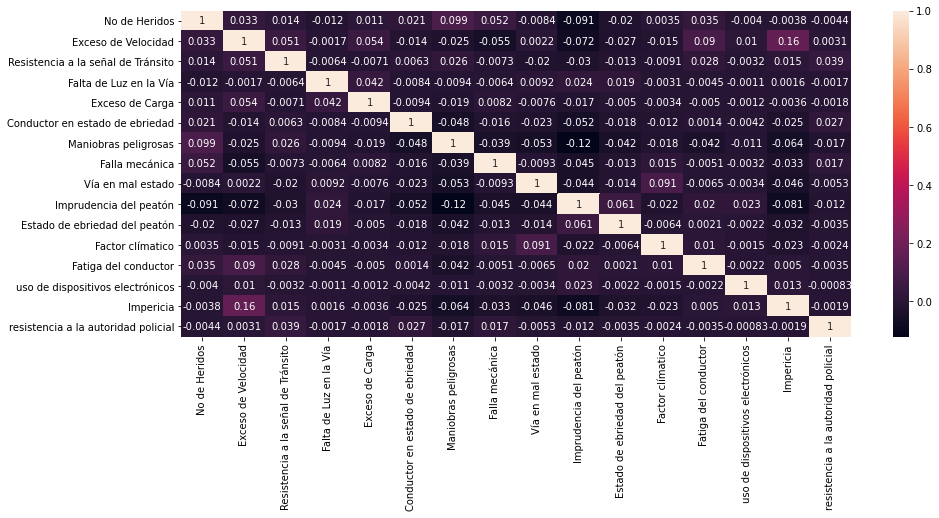

In [21]:
corr_df = a.corr(method='pearson') # correlacion de pearson a la data asignada

plt.figure(figsize=(15, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

##### ANALISIS DE LA CORRELACION
En base a los datos mostrados anteriormente y la matriz de correlación, notamos que la variable maniobras peligroasas es una de las que más tiene correlacion con el número de heridos, por otro lado tenemos a la variable fallas mecánicas y exceso de velocidad, en base a dicha matriz y el analisis estadistico y exploratorio, definimos las variables a regresionar el modelo.

## Establecimiento del modelo de regresion lineal que mejor se ajusta

Hay 2 enfoques para establer un modelo econometrico, en este caso una regresion lienal, estos enfoque son los siguientes:

#### 1. ENFOQUE 1 : ARRIBA - ABAJO
- Inicialmente hacemos una regresion poniendo todas o la mayoria de varibales explicativas
- Luego comenzamos a descartar las variables explicativas en base a las pruebas de significancia individual (ratio t), prueba de significancia conjunta (ratio F), asi como criterios de informacios como el Akaike y el schwarz

#### 2. ENFOQUE 2: ABAJO - ARRIBA
- Empiezo con un modelo que tiene una forma base con sólo algunas variables explicativas
- En base a mi modelo voy añadiendo y quitando variables explicativas, siempre mirando la siginficancia ya sea individual como conjunta, asimismo que existe un sustento teórico, viendo el R2 y los criterios de informacion.

En base al conocimiento de dichos 2 métodos, lo que realicé fue una combinación de los 2, inicialmente añadí la mayor cantidad de variables explicativas para predecir el número de heridos por accidentes de tránsito y de esa manera se va eliminando las variables en base a las pruebas de significancia, criterios de informacion, R2 ajustado, entre otras, ya establecido un modelo con pocas variables explicativas, realicé el método 2, añadiendo y quitando variables para obtener un RMSE mas bajo, asimismo viendo que variables se relacion teoricamente con la variable dependiente.
Ya escogido el modelo pasaremos a predicir y explicar el comportamiento de las relaciones de las varibales explicativas con la variable dependiente:

## MODELO ESCOGIDO

In [22]:
#asignando las variables explicativas y la dependientes en "x" y "y"
x = data[["Exceso de Velocidad","Conductor en estado de ebriedad","Maniobras peligrosas","Falla mecánica","Imprudencia del peatón","Fatiga del conductor"]]
y = data["No de Heridos"]

In [23]:
#usando statsmodels.api estimamos una regresion multivariada donde nos muestra el cuadro con la informacion adecuada
x = sm.add_constant(x) 
results = sm.OLS(y,x).fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          No de Heridos   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     34.79
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           7.82e-42
Time:                        14:16:17   Log-Likelihood:                -13816.
No. Observations:                9383   AIC:                         2.765e+04
Df Residuals:                    9376   BIC:                         2.770e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               1.3279      0.015     90.956      0.000       1.299       1.357
Exceso de Velocidad                 0.0791      0.027      2.956      0.003       0.027       0.132
Conductor en estado de ebriedad     0.1403      0.062      2.258      0.024       0.019       0.262
Maniobras peligrosas                0.2654      0.029      9.215      0.000       0.209       0.322
Falla mecánica                      0.4330      0.081      5.340      0.000       0.274       0.592
Imprudencia del peatón             -0.2650      0.037     -7.140      0.000      -0.338      -0.192
Fatiga del conductor                0.4247      0.114      3.717      0.000       0.201       0.649
==============================================================================
Omnibus:                    11187.812   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1887845.700
Skew:                           6.243   Prob(JB):                         0.00
Kurtosis:                      71.358   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretacion teórica de los coeficientes

##### variables relevantes en Número de heridos por accidentes de tránsito
Los accidentes de tránsito en el Perú es un problema muy relevante, Según el Ministerio de Salud, la Imprudencia, exceso de velocidad y consumo de alcohol son causas principales de los accidentes de tránsito.

* El exceso de velocidad es uno de los facotores determinantes para que ocurran accidentes de tránsito, el modelo mostrado, nos indica que si un accidente de tránsito se dió por exceso de velocidad, este podría aumentar 7.9% de que exista un herido más.
* Si el conductor se encuentra en estado de ebriedad, aumenta en 14% de que un accidente de tránsito genere un herido más.
* Si en conductor realiza maniobras peligrosas, aumenta en 26% que un accidente de tránsito genere un herido más
* Si un auto presenta fallas mecanicas, aumenta en 43% de que un accidente de tránsito genere un herido más.
* Si el peatón es pruedente, reduce en 26% de que un accidente genere un herido más
* Si existe fatiga del conductor, aumenta en 42% de que un accidente de transito genere un herido más.